## Part A)
Use the stub file $\texttt{FD.m}$ to create a function for the Frequent Directions algorithm ($\textbf{Algorithm 16.2.1}$).  We will consider running this code on matrix $\texttt{A.dat}$.  

In [19]:
import pandas as pd
import numpy as np
from scipy.linalg import norm
import math
import seaborn as sns
sns.set()
from numpy.random import normal
import matplotlib.pyplot as plt
from scipy.linalg import svd

In [2]:
pd.set_option('display.max_colwidth', 400)
pd.set_option('display.max_columns', None)  
pd.set_option('precision',3)

In [8]:
def FrequentDirections(A, l):
    l=l*2
    n, m = np.shape(A)
    
    if np.floor(l/2) >= m:
        raise ValueError("Error: \'l\' must be smaller than m*2")
    if l >= n:
        raise ValueError("Error: \'l\' must not be greater than n")
        
    # Initialize output matrix B
    B = np.zeros([l,m])
    
     # Compute zero valued row list
    zero_rows = np.nonzero([round(s, 4) == 0.0 for s in np.sum(B, axis = 1)])[0].tolist()
    
    # Repeat inserting each row of matrix A
    for i in range(n):
        if len(zero_rows) > 0:
            # Insert a row into matrix B
            B[zero_rows[0], :] = A[i, :]

            # Remove zero valued row from the list
            zero_rows.remove(zero_rows[0])

        # If there is no more zero valued rows
        elif len(zero_rows) == 0:

            # Compute SVD of matrix B
            U, s, V = svd(B, full_matrices=False)

            # Obtain squared singular value for threshold
            sq_sv_center = s[int(np.floor(l/2))]**2

            # Update sigma to shrink the row norms
            sigma_tilda = [(0.0 if d < 0.0 else np.sqrt(d)) for d in (s**2 - sq_sv_center)]

            # Update matrix B where at least half the rows are all zero
            B = np.dot(np.diagflat(sigma_tilda), V)

            # Update the zero valued row list
            zero_rows = np.nonzero([round(s, 4) == 0.0 for s in np.sum(B, axis = 1)])[0].tolist()
    return B

In [4]:
l = 35

In [5]:
questions = pd.read_csv('../profiles/question_counts.csv')

In [6]:
mat = questions.values[:,1:]

In [7]:
mat

array([[3., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
 B = FrequentDirections(mat, l)

In [10]:
freq_directions = pd.DataFrame(B, columns=questions.columns.values[1:] )

In [11]:
freq_directions.head(8).round(decimals=0)

,flex,actionscript-3,svn,sql,asp.net,algorithm,colors,c#,.net,c++,oop,class,web-services,sql-server,deployment,visual-studio,windows,database,loops,unix,web-applications,unit-testing,testing,version-control,postgresql,stored-procedures,datatable,vbscript,html,c,data-structures,flash,video,powershell,optimization,winforms,error-handling,php,mysql,security,math,ruby,java,user-interface,xml,regex,email,forms,sharepoint,vb.net,date,indexing,authentication,logging,multithreading,animation,linux,ssh,selenium,javascript,firefox,memory,file,css,validation,printing,linq,plugins,ant,collections,osx,winapi,objective-c,function,pointers,syntax,parameters,string,binding,emacs,apache,python,tsql,sqlite,iis,ajax,performance,design-patterns,internet-explorer,unicode,orm,sockets,jsp,tomcat,exception,process,batch-file,opengl,vim,linq-to-sql,ubuntu,delphi,reporting-services,design,graphics,enums,spring,hash,haskell,types,api,encryption,parsing,ruby-on-rails,gridview,xcode,swing,silverlight,django,url,caching,wcf,datetime,networking,session,cookies,arrays,database-design,concurrency,serialization,lambda,model-view-controller,dom,pdf,import,hibernate,jquery,json,xpath,browser,excel,excel-vba,recursion,qt,casting,android,rest,soap,wpf,oracle,reflection,inheritance,http,debugging,xslt,image,templates,.htaccess,eclipse,perl,iframe,audio,sorting,assembly,bash,data-binding,ssis,methods,codeigniter,zend-framework,file-io,command-line,shell,tfs,dictionary,properties,interface,tkinter,iphone,ms-access,vba,gcc,search,activerecord,mod-rewrite,cocoa,events,time,charts,graph,object,git,paypal,scala,list,login,cakephp,pdo,ssl,https,variables,service,grails,google-analytics,svg,combobox,layout,entity-framework,scroll,wordpress,text,utf-8,random,google-chrome,rspec,makefile,generics,sed,struct,jsf,listview,drop-down-menu,plsql,build,jpa,encoding,module,post,google-app-engine,file-upload,jar,facebook,groovy,matlab,fonts,for-loop,asynchronous,arraylist,jdbc,mobile,xaml,java-ee,servlets,constructor,nginx,csv,gwt,view,tcp,curl,numpy,drupal,boost,image-processing,dll,cocoa-touch,bitmap,plot,netbeans,matrix,dependency-injection,timer,while-loop,intellij-idea,button,razor,replace,mysqli,filter,google-maps,hyperlink,if-statement,junit,spring-security,multidimensional-array,datagridview,join,extjs,select,twitter,redirect,ios,checkbox,spring-mvc,uitableview,amazon-ec2,amazon-web-services,hadoop,vector,cmd,input,open-gl,github,opencv,mvvm,azure,machine-learning,awk,dynamic,joomla,canvas,windows-phone,javafx,web,r,clojure,uiview,unity3d,magento,oauth,uiviewcontroller,matplotlib,core-data,swift,cordova,solr,heroku,maven,webview,table,oracle11g,jenkins,css3,yii,ggplot2,go,node.js,dataframe,mongodb,ipad,elasticsearch,playframework,google-apps-script,facebook-graph-api,symfony2,gradle,primefaces,doctrine2,flask,highcharts,express,knockout.js,backbone.js,mongoose,xamarin,angularjs,responsive-design,d3.js,twitter-bootstrap,pandas,ember.js,kendo-ui,meteor,laravel,firebase,parse.com,typescript,docker,apache-spark,reactjs,spring-boot,ionic-framework
0,3.0,5.0,4.0,71.0,230.0,8.0,2.0,340.0,90.0,53.0,8.0,7.0,10.0,60.0,3.0,45.0,14.0,21.0,5.0,3.0,3.0,10.0,4.0,3.0,9.0,5.0,3.0,2.0,195.0,18.0,2.0,6.0,3.0,4.0,3.0,21.0,2.0,205.0,78.0,9.0,4.0,34.0,171.0,6.0,26.0,29.0,7.0,15.0,4.0,18.0,7.0,3.0,5.0,4.0,15.0,5.0,14.0,1.0,5.0,381.0,6.0,7.0,7.0,133.0,10.0,2.0,24.0,3.0,2.0,4.0,8.0,4.0,36.0,7.0,3.0,2.0,2.0,16.0,2.0,1.0,10.0,76.0,12.0,9.0,7.0,44.0,12.0,5.0,9.0,2.0,2.0,5.0,6.0,4.0,5.0,2.0,3.0,2.0,2.0,6.0,4.0,3.0,3.0,3.0,2.0,3.0,16.0,3.0,2.0,3.0,7.0,3.0,6.0,95.0,6.0,12.0,8.0,7.0,23.0,5.0,6.0,12.0,9.0,3.0,7.0,5.0,29.0,5.0,2.0,5.0,3.0,4.0,7.0,5.0,2.0,14.0,321.0,37.0,3.0,5.0,10.0,3.0,3.0,4.0,2.0,183.0,8.0,3.0,29.0,8.0,5.0,4.0,7.0,7.0,3.0,13.0,5.0,9.0,15.0,4.0,6.0,3.0,6.0,2.0,7.0,5.0,2.0,3.0,12.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,3.0,1.0,31.0,4.0,5.0,2.0,4.0,5.0,4.0,4.0,7.0,2.0,3.0,1.0,6.0,13.0,2.0,7.0,7.0,2.0,6.0,4.0,4.0,2.0,5.0,2.0,3.0,2.0,4.0,2.0,4.0,22.0,3.0,16.0,3.0,2.0,2.0,12.0,3.0,1.0,6.0,1.0,1.0,7.0,6.0,

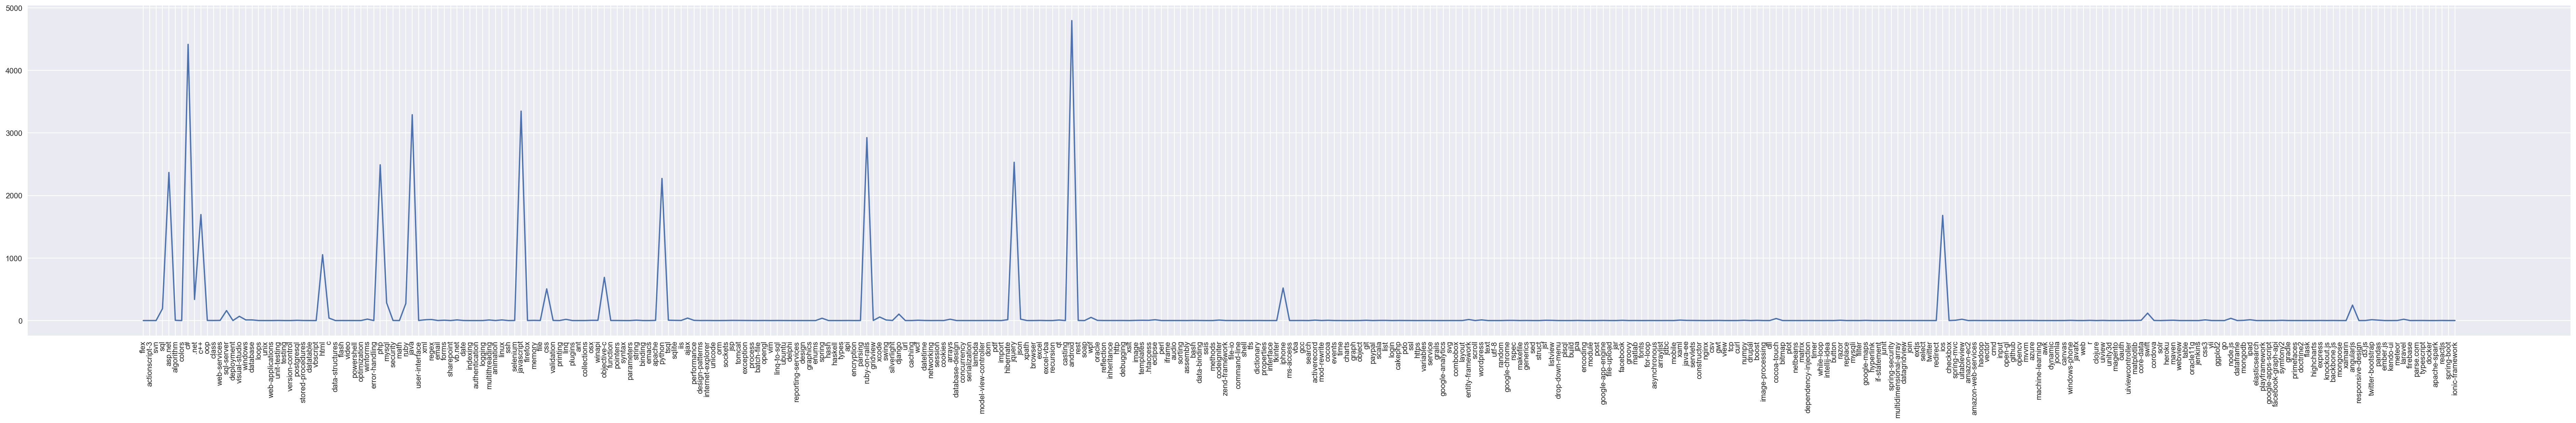

In [33]:
labels = freq_directions.columns.values.tolist()
fig = plt.figure(figsize = (60,8),dpi=160)
plt.plot(range(362), freq_directions.var().values)
plt.xticks(range(362), labels, rotation = 90);